In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from skidl.pyspice import *
print(lib_search_paths)

{'kicad': ['.'], 'skidl': ['.', '/usr/local/lib/python3.6/site-packages/skidl/libs'], 'spice': ['.']}



No errors or warnings found during netlist generation.



   V    I (mA)
  0.00  -0.00
  0.10   0.10
  0.20   0.20
  0.30   0.30
  0.40   0.40
  0.50   0.50
  0.60   0.60
  0.70   0.70
  0.80   0.80
  0.90   0.90
  1.00   1.00


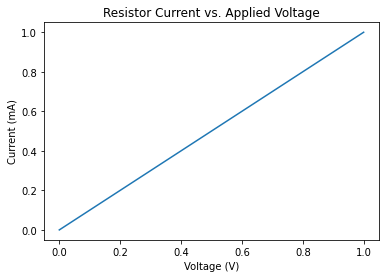

In [2]:
reset()  # This will clear any previously defined circuitry.

# Create and interconnect the components.
vs = V(ref='VS', dc_value = 1 @ u_V)  # Create a voltage source named "VS" with an initial value of 1 volt.
r1 = R(value = 1 @ u_kOhm)            # Create a 1 Kohm resistor.
vs['p'] += r1[1]       # Connect one end of the resistor to the positive terminal of the voltage source.
gnd += vs['n'], r1[2]  # Connect the other end of the resistor and the negative terminal of the source to ground.

# Simulate the circuit.
circ = generate_netlist()              # Translate the SKiDL code into a PyCircuit Circuit object.
sim = circ.simulator()                 # Create a simulator for the Circuit object.
dc_vals = sim.dc(VS=slice(0, 1, 0.1))  # Run a DC simulation where the voltage ramps from 0 to 1V by 0.1V increments.

# Get the voltage applied to the resistor and the current coming out of the voltage source.
voltage = dc_vals[node(vs['p'])]       # Get the voltage applied by the positive terminal of the source.
current = -dc_vals['VS']               # Get the current coming out of the positive terminal of the voltage source.

# Print a table showing the current through the resistor for the various applied voltages.
print('{:^7s}{:^7s}'.format('V', ' I (mA)'))
print('='*15)
for v, i in zip(voltage.as_ndarray(), current.as_ndarray()*1000):
    print('{:6.2f} {:6.2f}'.format(v, i))

# Create a plot of the current (Y coord) versus the applied voltage (X coord).
figure = plt.figure(1)
plt.title('Resistor Current vs. Applied Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.plot(voltage, current*1000) # Plot X=voltage and Y=current (in milliamps, so multiply it by 1000).
plt.show()